___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# LendingClub Project 
*the project is based on pieriandata DataScience course*


For this project I will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back.

I will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action).

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [515]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [516]:
lcdf = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [517]:
lcdf.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [518]:
lcdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [519]:
lcdf.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [520]:
pd.DataFrame(index = ["unique_values"],data = np.array([lcdf[column].value_counts().shape[0] for column in lcdf.columns]).reshape(1,14), columns = lcdf.columns)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
unique_values,2,7,249,4788,1987,2529,44,2687,7869,1035,28,11,6,2


In [521]:
lcdf['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [522]:
lcdf.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# Exploratory Data Analysis


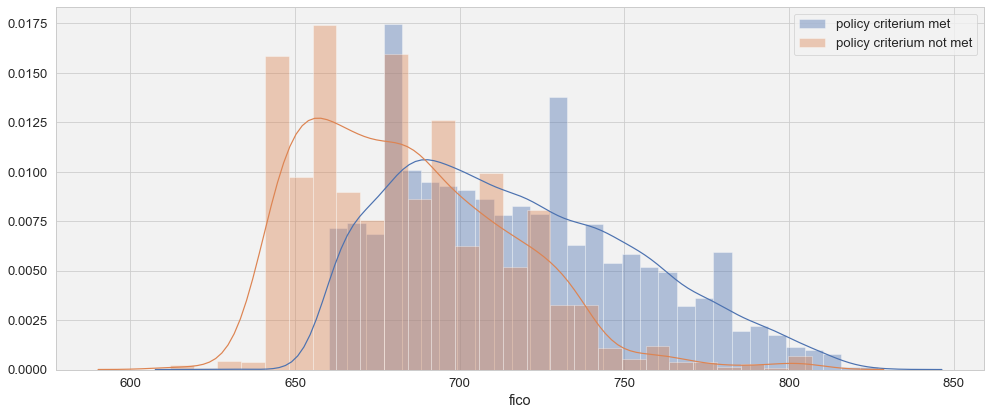

In [523]:
criterium = 'credit.policy'
sns.set()
with sns.axes_style("whitegrid", {"axes.facecolor": ".95"}):
    plt.figure(figsize=(14,6))
    sns.set_context('paper',font_scale=1.5)
    g = sns.distplot(a = lcdf['fico'][lcdf[criterium] == 1])
    h = sns.distplot(a = lcdf['fico'][lcdf[criterium] == 0])
    plt.legend(loc = 'upper right',labels=["policy criterium met","policy criterium not met"])
    plt.tight_layout()

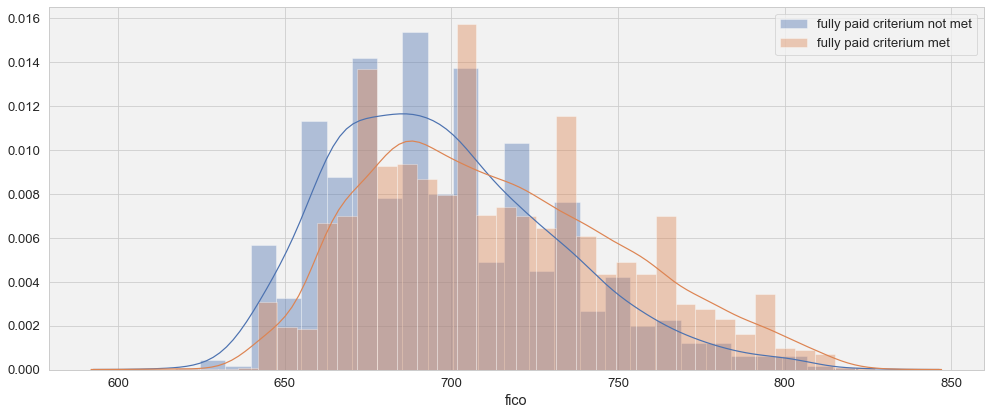

In [524]:
criterium = 'not.fully.paid'
sns.set()
with sns.axes_style("whitegrid", {"axes.facecolor": ".95"}):
    plt.figure(figsize=(14,6))
    sns.set_context('paper',font_scale=1.5)
    g = sns.distplot(a = lcdf['fico'][lcdf[criterium] == 1])
    h = sns.distplot(a = lcdf['fico'][lcdf[criterium] == 0])
    plt.legend(loc = 'upper right',labels=["fully paid criterium not met","fully paid criterium met"])
    plt.tight_layout()

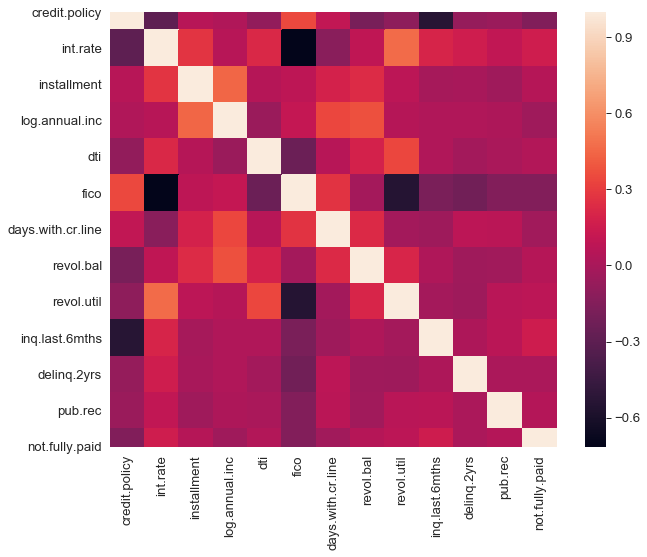

In [525]:
plt.figure(figsize=(10,8))
sns.heatmap(lcdf.corr())

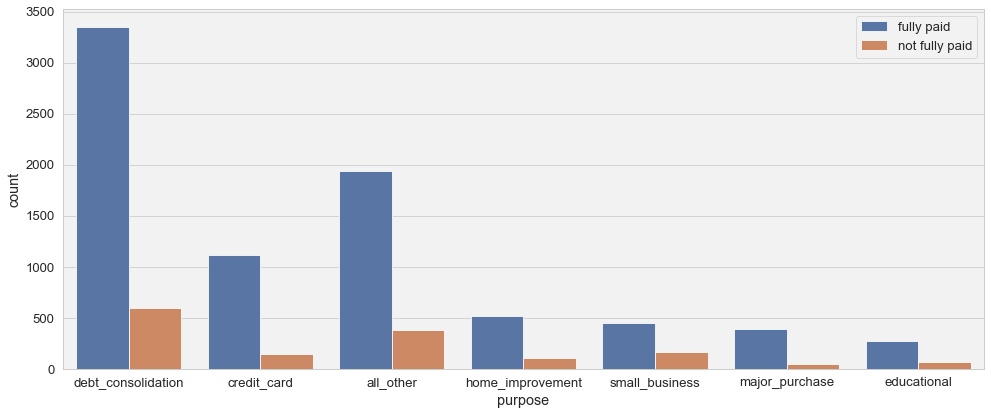

In [526]:
sns.set()
with sns.axes_style("whitegrid", {"axes.facecolor": ".95"}):
    plt.figure(figsize=(14,6))
    sns.set_context('paper',font_scale=1.5)
    g = sns.countplot(x = 'purpose', data=lcdf, hue="not.fully.paid")
    plt.legend(loc = 'upper right',labels=["fully paid","not fully paid"])
    plt.tight_layout()

### Predictive models

Let's test some models trying to predict wether the loan will be paid back or not.

In [527]:
dummy_lcdf = pd.get_dummies(data = lcdf, columns=['purpose'], drop_first=True)

In [528]:
from sklearn.model_selection import train_test_split

In [536]:
X = dummy_lcdf.drop('not.fully.paid',axis=1)
y = dummy_lcdf['not.fully.paid']
dummy_lcdf.to_csv('dummy_loan.csv')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [530]:
y_test.sum()

443

## Training a Decision Tree Model

As a baseline we will start with a simple single decision tree.

In [531]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [17]:
tree_class = DecisionTreeClassifier()

In [19]:
model = tree_class.fit(X_train,y_train)

In [20]:
y_pred = model.predict(X_test)

In [532]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(confusion_matrix(y_test,y_pred))

[[2001  430]
 [ 340  103]]


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



We can see it did rather poorly. We did managed to catch some of the non-paid loans, but we paid the price of missclasifying many that would be paid back.

## Training the Random Forest model

We will try to improve our model with RandomForests.

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
from sklearn.model_selection import GridSearchCV

In [475]:
randf_csf = RandomForestClassifier(n_estimators=3000)

In [476]:
pre_GS_model = randf_csf.fit(X_train, y_train)

In [477]:
y_pred  = pre_GS_model.predict(X_test)

In [478]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.65      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.75      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874



We can see that the effectivenes improved instantly, yet now we recalled only 2% of non-paid loans, which is not a good thing. We can change that by putting more weight on the non-paid loans and doing some grid search for further improvements!

We set the weigths to {paid: 1, non-paid: 3}

In [422]:
param_test1 = {
 'max_depth':np.arange(1,15,2)
}

In [423]:
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=400, class_weight={0: 1, 1: 3}),param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5, verbose = 3)

In [424]:
gsearch1.fit(X_train, y_train)
gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   20.9s
[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:   34.1s finished


({'max_depth': 5}, 0.6756031123894313)

In [425]:
param_test2 = {
 'min_weight_fraction_leaf':np.arange(0.0,0.5,0.1),
 'max_depth':np.arange(4,7)
}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators=400, class_weight={0: 1, 1: 3}),param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5, verbose = 3)
gsearch2.fit(X_train, y_train)
gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   13.2s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   39.5s finished


({'max_depth': 6, 'min_weight_fraction_leaf': 0.0}, 0.676339016850757)

In [467]:
randf_csf = RandomForestClassifier(n_estimators=5000, max_depth=7, class_weight={0: 1, 1: 3})

In [468]:
model = randf_csf.fit(X_train,y_train)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.


In [469]:
y_pred  = model.predict(X_test)

In [543]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.12      0.22      2431
           1       0.15      0.87      0.26       443

    accuracy                           0.24      2874
   macro avg       0.50      0.50      0.24      2874
weighted avg       0.74      0.24      0.22      2874



In [161]:
print(confusion_matrix(y_test,y_pred))

[[2428    3]
 [ 442    1]]


We have improved our recall to 15% of non-paid loans without to loosing to much of paid loans!

We could now try boosting trees, but instead, in the next section we will take it further by trying to use the state-state-of-the-art algorithm called the **XGBoost!**

In [457]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [471]:
xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [472]:
xgb_model = xgb1.fit(X_train, y_train)

In [506]:
xgb_model.score(X_train, y_train)

0.9768794749403341

In [473]:
y_pred = xgb_model.predict(X_test)

In [474]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2431
           1       0.35      0.07      0.11       443

    accuracy                           0.84      2874
   macro avg       0.60      0.52      0.51      2874
weighted avg       0.77      0.84      0.79      2874



We could already call that a pretty good outcome! 
But it will surely not harm us to do some **hyperparameter tuning.**

In [482]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.6774593966910919)

In [484]:
param_test2 = {
 'max_depth':range(1,4,1),
 'min_child_weight':range(1,3,1)
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.6774593966910919)

In [486]:
param_test3 = {
 'gamma':np.arange(0,0.5,0.1)
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.2}, 0.6776450540274841)

In [493]:
param_test4 = {
 'gamma':np.arange(0.1,0.22,0.02)
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'gamma': 0.18000000000000002}, 0.6776491402174334)

In [492]:
np.arange(0.1,0.21,0.02)

array([0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ])

In [495]:
param_test5 = {
 'subsample': np.arange(0.6, 1, 0.1),
 'colsample_bytree':np.arange(0.6, 1, 0.1)
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=1, gamma=0.18, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.7999999999999999, 'subsample': 0.7999999999999999},
 0.6776491402174334)

In [496]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=1, gamma=0.18, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train,y_train)
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 1}, 0.6777361683453175)

In [497]:
xgb = XGBClassifier(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=3,
 min_child_weight=1,
 gamma=0.18,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 reg_alpha= 1)

In [507]:
xgb_model = xgb.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      2431
           1       0.40      0.05      0.10       443

    accuracy                           0.84      2874
   macro avg       0.63      0.52      0.50      2874
weighted avg       0.78      0.84      0.79      2874



## Stacking
Now, since we tuned our RandomForest to be more focused on predicting non-paid loans, and our xgboost to be as generally accurate as possible, we can now try to combine those two methods to get the best of both worlds.

To see the notebook on that please follow the [LendingClub: Part2 - Ensamble Stacking](https://github.com/PatrykRadon/LendingClub-Project/blob/master/LendingClub:%20Part2%20-%20Ensemble%20Stacking.ipynb) link.